<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_453211454_0_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.003)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 453211454
period = 9.05853694381109  # Orbital period in days
epoch = 1494.45692705619
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.4]
folded_lc = folded_lc[folded_lc.time > -0.4]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_453211454_all_sector_lightcurve.csv


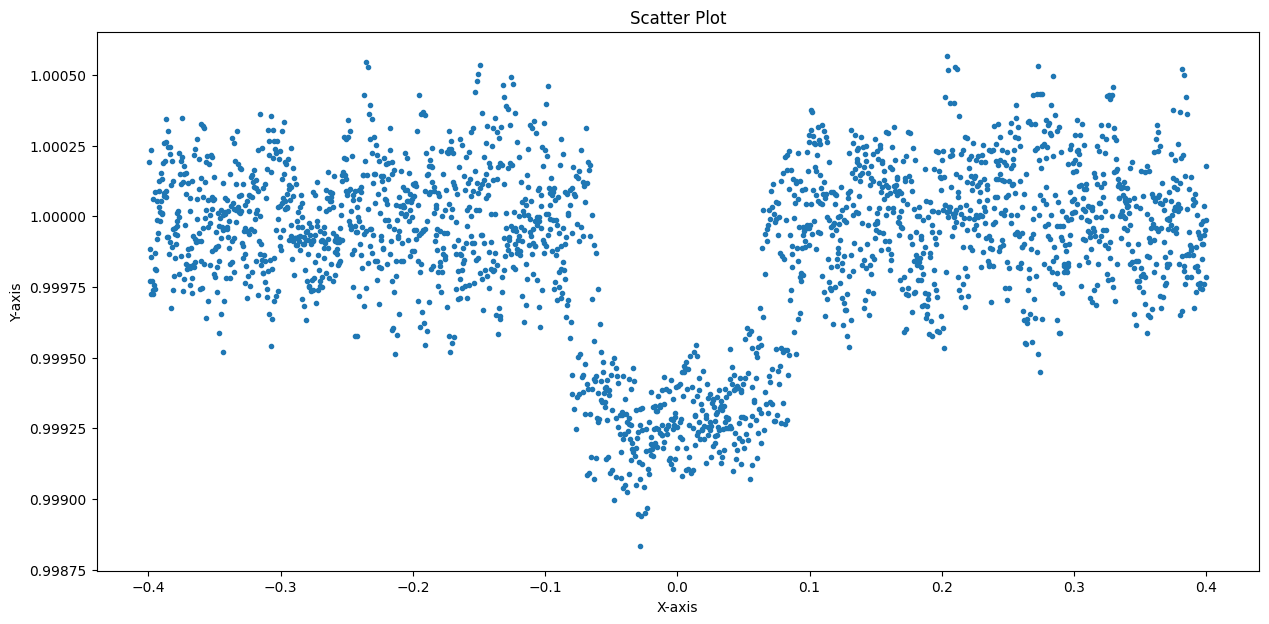

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [20]:
ID = tic_id
sectors = np.array([7, 34])
target = tr.target(ID=ID, sectors=sectors, search_radius=6) # target radius shorted

<ipython-input-21-1d1cc10ca2c4>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_7, ap_34])


Sector 7


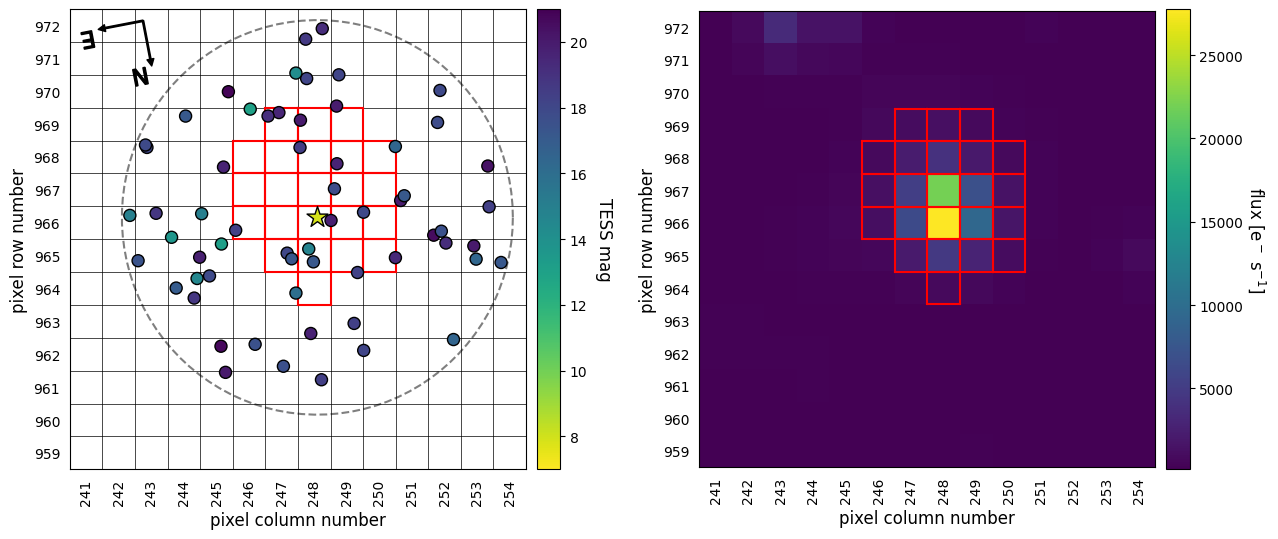

Sector 34


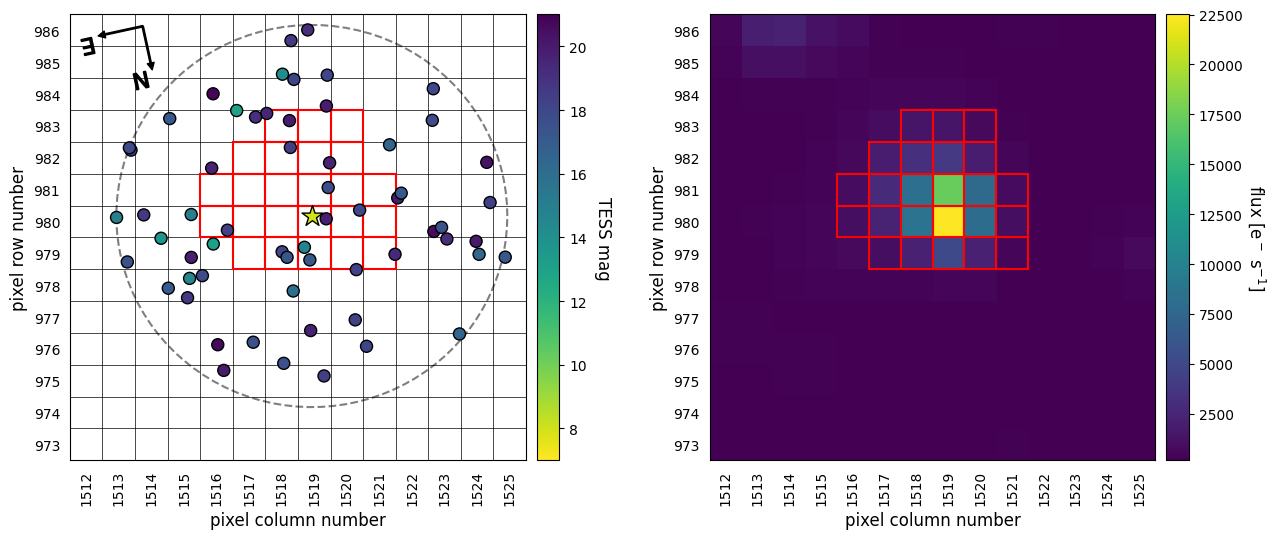

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,453211454,7.9259,7.304,6.964,6.881,117.924986,9.386054,0.98,0.962324,5560.26,20.390200,0.000,0.000
1,760306664,19.7462,NaN,NaN,NaN,117.922664,9.387050,NaN,NaN,NaN,NaN,8.992,293.515
2,453211451,14.7513,13.858,13.345,13.246,117.927624,9.391169,NaN,4.646660,4912.00,0.169549,20.664,26.969
3,760306663,17.7902,NaN,NaN,NaN,117.920950,9.381739,NaN,NaN,NaN,0.198006,21.134,222.700
4,453211447,17.1983,16.076,15.461,15.262,117.927252,9.393540,0.66,0.645351,4189.00,0.766232,28.127,16.627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,320417174,17.4232,16.270,15.716,15.505,117.958374,9.387332,0.69,0.795014,4387.00,0.397421,118.678,87.776
58,760306640,19.2217,NaN,NaN,NaN,117.917496,9.353867,NaN,NaN,NaN,-0.200901,118.886,192.932
59,320417152,17.8704,16.302,15.360,15.163,117.952998,9.367758,NaN,NaN,NaN,NaN,119.322,123.502
60,320417163,14.9324,14.253,13.882,13.826,117.958248,9.379283,0.99,0.824468,5607.00,0.921938,120.631,101.654


In [21]:
ap_7 = np.array([[246.0, 966.0], [246.0, 967.0], [246.0, 968.0], [247.0, 965.0], [247.0,
        966.0], [247.0, 967.0], [247.0, 968.0], [247.0, 969.0], [248.0, 964.0], [
        248.0, 965.0], [248.0, 966.0], [248.0, 967.0], [248.0, 968.0], [248.0, 969.0],
      [249.0, 965.0], [249.0, 966.0], [249.0, 967.0], [249.0, 968.0], [249.0, 969.0],
      [250.0, 965.0], [250.0, 966.0], [250.0, 967.0], [250.0, 968.0]])
ap_34 = np.array([[1516.0, 980.0], [1516.0, 981.0], [1517.0, 979.0], [1517.0, 980.0], [1517.0, 981.0],
      [1517.0, 982.0], [1518.0, 979.0], [1518.0, 980.0], [1518.0, 981.0], [1518.0,
        982.0], [1518.0, 983.0], [1519.0, 979.0], [1519.0, 980.0], [1519.0, 981.0],
      [1519.0, 982.0], [1519.0, 983.0], [1520.0, 979.0], [1520.0, 980.0], [1520.0,
        981.0], [1520.0, 982.0], [1520.0, 983.0], [1521.0, 979.0], [1521.0, 980.0],
      [1521.0, 981.0]])

apertures = np.array([ap_7, ap_34])
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [22]:
tdepth = 0.726 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,453211454,7.9259,7.304,6.964,6.881,117.924986,9.386054,0.98,0.962324,5560.26,20.390200,0.000,0.000,9.930885e-01,0.000731
1,760306664,19.7462,NaN,NaN,NaN,117.922664,9.387050,NaN,NaN,NaN,NaN,8.992,293.515,1.845541e-05,0.000000
2,453211451,14.7513,13.858,13.345,13.246,117.927624,9.391169,NaN,4.646660,4912.00,0.169549,20.664,26.969,1.596389e-03,0.454776
3,760306663,17.7902,NaN,NaN,NaN,117.920950,9.381739,NaN,NaN,NaN,0.198006,21.134,222.700,1.119897e-04,0.000000
4,453211447,17.1983,16.076,15.461,15.262,117.927252,9.393540,0.66,0.645351,4189.00,0.766232,28.127,16.627,1.422399e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,320417174,17.4232,16.270,15.716,15.505,117.958374,9.387332,0.69,0.795014,4387.00,0.397421,118.678,87.776,1.844762e-08,0.000000
58,760306640,19.2217,NaN,NaN,NaN,117.917496,9.353867,NaN,NaN,NaN,-0.200901,118.886,192.932,1.547856e-08,0.000000
59,320417152,17.8704,16.302,15.360,15.163,117.952998,9.367758,NaN,NaN,NaN,NaN,119.322,123.502,1.943595e-08,0.000000
60,320417163,14.9324,14.253,13.882,13.826,117.958248,9.379283,0.99,0.824468,5607.00,0.921938,120.631,101.654,1.952524e-07,0.000000


In [23]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 453211454.
Calculating EB and EBx2P scenario probabilities for 453211454.
Calculating PTP scenario probability for 453211454.
Calculating PEB and PEBx2P scenario probabilities for 453211454.
Calculating STP scenario probability for 453211454.
Calculating SEB and SEBx2P scenario probabilities for 453211454.
Calculating DTP scenario probability for 453211454.
Calculating DEB and DEBx2P scenario probabilities for 453211454.
Calculating BTP scenario probability for 453211454.
Calculating BEB and BEBx2P scenario probabilities for 453211454.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 453211451.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 320417175.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 453211462.
CPU times: user 10min 51s, sys: 7.61 s, total: 10min 59s
Wall time: 6min 49s


In [24]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.03476567
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,453211454,TP,0.980000,0.962324,9.058537,87.613759,0.716338,7.469019e-01,223.584533,2.885996,0.000000,0.000000,7.507059e-01
1,453211454,EB,0.980000,0.962324,9.058537,83.978692,1.461522,4.081278e-01,82.632293,0.000000,0.907295,0.946974,2.237340e-238
2,453211454,EBx2P,0.980000,0.962324,18.117074,88.016048,0.775776,5.640007e-01,164.731391,0.000000,0.978724,0.962324,1.690768e-116
3,453211454,PTP,0.980000,0.962324,9.058537,88.286930,0.509534,4.979320e-01,199.614447,2.929543,0.000000,0.000000,1.313259e-01
4,453211454,PEB,0.980000,0.962324,9.058537,84.701134,1.899520,1.437967e-01,56.902659,0.000000,0.919154,0.962324,1.565259e-254
5,453211454,PEBx2P,0.980000,0.962324,18.117074,88.357485,0.262058,8.615688e-01,175.837381,0.000000,0.971565,0.962324,1.626209e-134
6,453211454,STP,0.823591,0.849958,9.058537,89.838672,0.054407,7.857005e-02,151.686218,4.030510,0.000000,0.000000,3.321944e-02
7,453211454,SEB,0.177896,0.209500,9.058537,89.845215,0.068763,8.254327e-01,205.001378,0.000000,0.033652,0.100000,1.069209e-13
8,453211454,SEBx2P,0.243567,0.269024,18.117074,89.366109,0.651136,5.456632e-01,179.458705,0.000000,0.232282,0.259040,3.814363e-37
9,453211454,DTP,0.980000,0.962324,9.058537,88.038798,0.408483,7.483589e-01,203.989153,3.140173,0.000000,0.000000,8.320253e-02


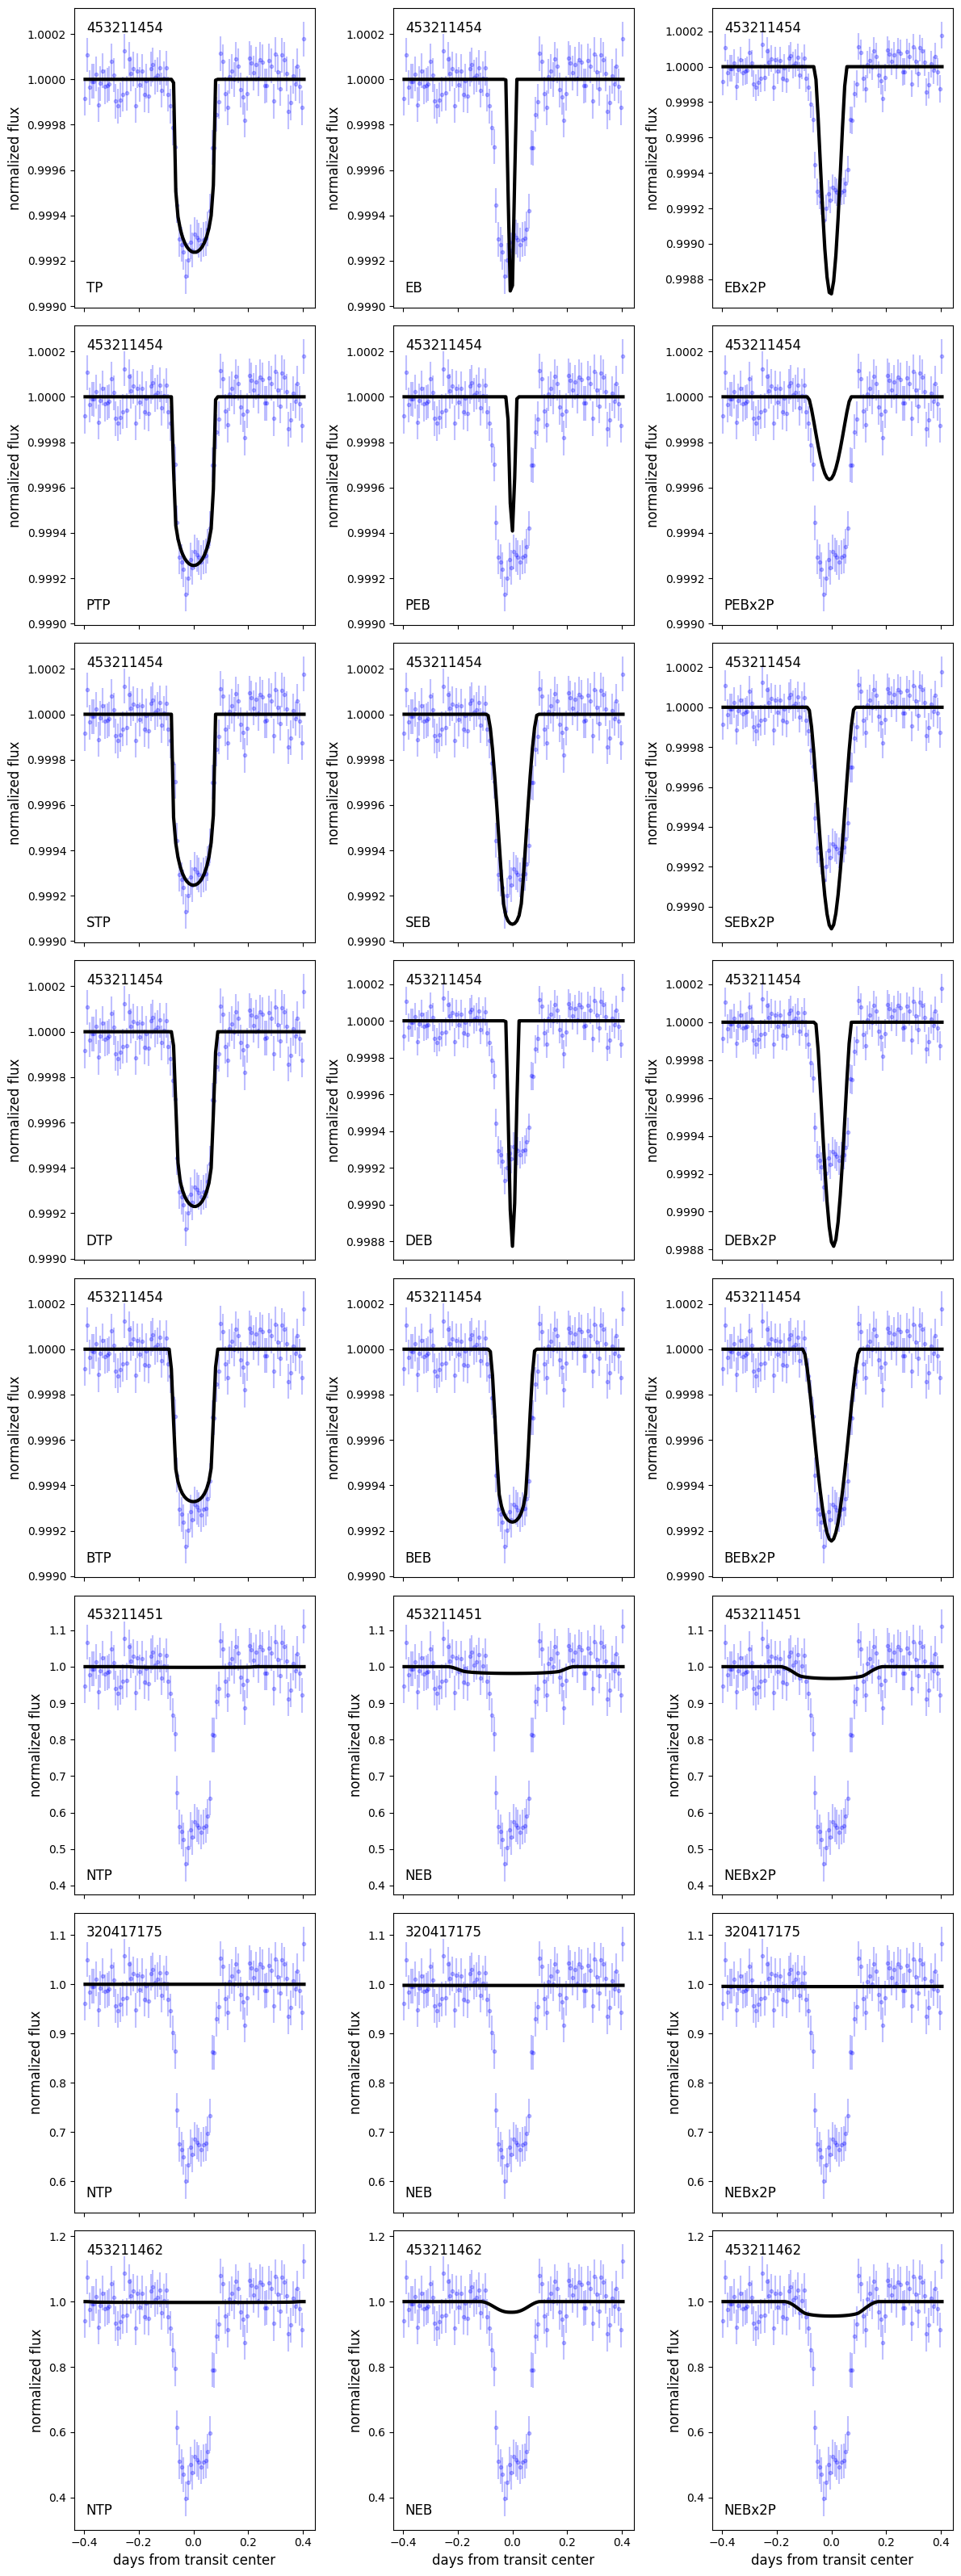

In [26]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [27]:
%%time

FPPs = np.zeros(12)
NFPPs = np.zeros(12)
for i in range(12):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.16708591047284901 +/- 0.1560253462822564
NFPP = 1.1849671408203063e-256 +/- 0.0
CPU times: user 2h 10min 28s, sys: 1min 17s, total: 2h 11min 45s
Wall time: 1h 21min 18s


Our final conclusion about this specified planet of TIC 453211454 is that it is ? (according to the range of FPP and NFPP set by TRICERATOPS).